Group Members
--------------
Edwin Martinez PID: A11151619
Hannah Marie Valenzuela PID:
Raafat Samuail PID:

## Introduction and Background


Many people in the United States try to make a better life for themselves. This often implies to get a better education and get a degree in order to compete in the job market. Attending a Universtity is a way for teenagers to enter a program that trains them for a certain profession. It is no wonder why most teenageers are matriculated into a university in hopes of obtaining a job once their studies conclude.   However, university/college tuition in the United States is not free, and it's no surprise that the cost of a degree has changed. This leads us to our question,
 * how much has tuition changed over the years since [INSERT YEAR HERE], with respect to the avarege income.


This question is important to us for different reasons. One being that everyone involved in this project comes from low income families, and is currently attending one of the most expensive public schools. We were wondering how much the tuition has changed. At  the same time, we were able to find datasets for 2 decades from the Department of Education. The reason why this was important to us is because we have recently experienced an increase in tuition, and this is worrisome because there are still other materials (books, writing utensils, etc.) that aren't accounted for in our tuition.
	Based on New York Times, the tuitions and fees have increased about $155 for a four year public school, and it reaches an average of $3000 per a year. Now if we compare that price to today’s cost of attendance, we will see a massive gap in price range. Now in terms of financial aid, based on the College Board Organization, an undergraduate student used to get financial aid that covers all his/her tution, and in fact he/she was able to save some of it. Now this is not the case because tution seems to be increasing more as the years pass.


## Data Description

Since we decide to see the change in tution with respect to income, we needed real data that come from the actual Department of 
Education of the United States. The Department of Eduacation had public dataset that is over 230 MB in huge zip file. The data 
in the zip file was from 1996/1997 to 2016/2017. In addition, the files where saved in csv files, and those files had so much 
information. The information were about all undergraduate degree-granting institutions, and it included student completion, 
debt and repayment, earnings, and more. After finding the dataset that can show us the tution from creditable department, now is
the time to find another dataset that represent avarge income per states. Now income is another importat aspect that we are 
considering. After searching for many hours, we end up at the Deparment of Census. Department of Census has dataset for the 
income and proveity for different years. Their data was divided by state, race, and the top 5% of popliation. 

# Data Cleaning/ Pre-processing

# Data Vizualization

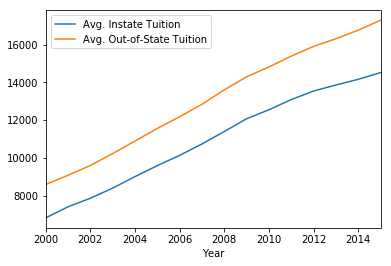

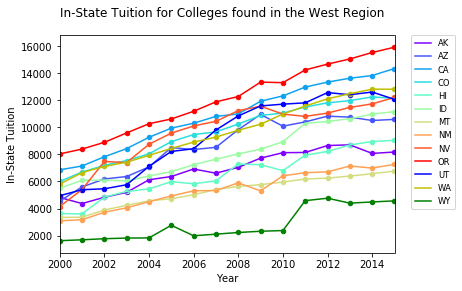

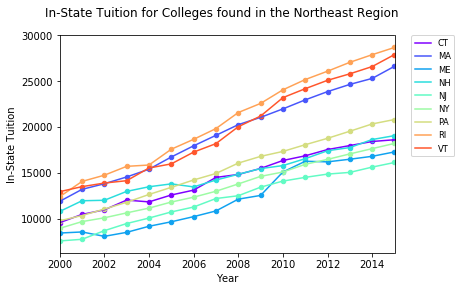

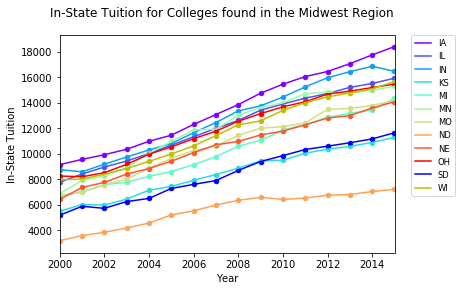

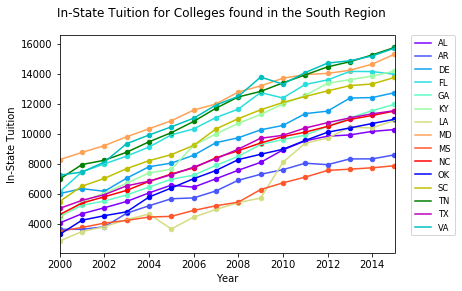

In [57]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import glob
from scipy.stats import uniform

fields=['STABBR','TUITIONFEE_IN','TUITIONFEE_OUT'] #columns to extract from CSV files

path ='CollegeScorecard_Raw_Data'
allFiles = glob.glob(path + "/*.csv")
avg_instate_tuition=[]
avg_outstate_tuition=[]
years=[] 
dfs=[] # array of dataframes for each year. Index refers to year
timeline = range(2000,2016) #range to create timeline of data we have

#for loop to fill in the timeline array with the correct years
for time in timeline:
    years.append(time)

#for loop that will fill in dfs array with dataframes corresponding to each year
#also calculates the average instate and out-of-state tuition per year
for file_ in allFiles:
    df = pd.read_csv(file_,usecols=fields)
    df.columns=['State', 'In-State Tuition', 'Out-of-State Tuition']
    dfs.append(df) 
    avg_instate = df['In-State Tuition'].mean()
    avg_outstate=df['Out-of-State Tuition'].mean()
    avg_instate_tuition.append(avg_instate)
    avg_outstate_tuition.append(avg_outstate)

#creates dataframe to hold average instate and out-of-state tution for years 2000-2015
avg_tuition = pd.DataFrame({'Year': years,'Avg. Instate Tuition': avg_instate_tuition,'Avg. Out-of-State Tuition': avg_outstate_tuition})
plt.figure();avg_tuition.plot(x='Year'); #plot of average instate and out-of-state tution from years 2000-2015

#loop through all dataframes in dfs array and drop na values,set index to state and sort it by state
#Calculate average instate and out-of-stae tuition by state and save it to dfs array
i = 0
for df in dfs:
    df.dropna(how='any',inplace=True)
    df['Year']=years[i]
    df = df.groupby(['State']).mean()
    dfs[i]=df
    i= i +1
result=pd.concat(dfs)
instate_tuition = result.drop('Out-of-State Tuition',axis=1)
outofstate_tuition = result.drop('In-State Tuition',axis=1)


West= ['AZ','CO','ID','MT','NV','NM','UT','WY','AK','CA','HI','OR','WA']
Northeast=['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']
Midwest = ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']
South=['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX']

#The following code is to help create different colors for each state
colors = ['r', 'b','y','g','m','c','k','w']
X = [1,2,3,4]
Ys = np.array([[4,8,12,16],
      [1,4,9,16],
      [17, 10, 13, 18],
      [9, 10, 18, 11],
      [4, 15, 17, 6],
      [7, 10, 8, 7],
      [9, 0, 10, 11],
      [14, 1, 15, 5],
      [8, 15, 9, 14],
       [20, 7, 1, 5]])
nCols = len(X)  
nRows = Ys.shape[0]
rain_colors = cm.rainbow(np.linspace(0, 1, len(Ys)))
cs = [rain_colors[i//len(X)] for i in range(len(Ys)*len(X))]
#Begin creating graph in-state tuition for West_Coast States

fig, ax = plt.subplots()
fig.suptitle('In-State Tuition for Colleges found in the West Region')
index = 0
j = 0
for key, grp in instate_tuition.groupby(['State']):
    if key in West:
        if index > len(colors):
            ax = grp.plot(ax=ax, kind='line', x='Year', y='In-State Tuition', label=key, c = colors[j])
            ax = grp.plot(ax=ax, kind='scatter', x='Year', y='In-State Tuition', c = colors[j])
            j = j +1
        else:  
            ax = grp.plot(ax=ax, kind='line', x='Year', y='In-State Tuition', label=key, c = rain_colors[index])
            ax = grp.plot(ax=ax, kind='scatter', x='Year', y='In-State Tuition', c = rain_colors[index])
            index = index +1
        
plt.legend(fontsize='small',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#Reset variables needed and graph in-state tuition for Northeast States
fig, bx = plt.subplots()
fig.suptitle('In-State Tuition for Colleges found in the Northeast Region')
index = 0
j = 0
for key, grp in instate_tuition.groupby(['State']):
    if key in Northeast:
        if index > len(colors):
            bx = grp.plot(ax=bx, kind='line', x='Year', y='In-State Tuition', label=key, c = colors[j])
            bx = grp.plot(ax=bx, kind='scatter', x='Year', y='In-State Tuition', c = colors[j])
            j = j +1
        else:  
            bx = grp.plot(ax=bx, kind='line', x='Year', y='In-State Tuition', label=key, c = rain_colors[index])
            bx = grp.plot(ax=bx, kind='scatter', x='Year', y='In-State Tuition', c = rain_colors[index])
            index = index +1
        
plt.legend(fontsize='small',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#Reset variables needed and graph in-state tuiton for Midwest States
fig, cx = plt.subplots()
fig.suptitle('In-State Tuition for Colleges found in the Midwest Region')
index = 0
j = 0
for key, grp in instate_tuition.groupby(['State']):
    if key in Midwest:
        if index > len(colors):
            cx = grp.plot(ax=cx, kind='line', x='Year', y='In-State Tuition', label=key, c = colors[j])
            cx = grp.plot(ax=cx, kind='scatter', x='Year', y='In-State Tuition', c = colors[j])
            j = j +1
        else:  
            cx = grp.plot(ax=cx, kind='line', x='Year', y='In-State Tuition', label=key, c = rain_colors[index])
            cx = grp.plot(ax=cx, kind='scatter', x='Year', y='In-State Tuition',  c = rain_colors[index])
            index = index +1
        
plt.legend(fontsize='small',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

fig, dx = plt.subplots()
fig.suptitle('In-State Tuition for Colleges found in the South Region')
index = 0
j = 0
for key, grp in instate_tuition.groupby(['State']):
    if key in South:
        if index > len(colors):
            dx = grp.plot(ax=dx, kind='line', x='Year', y='In-State Tuition', label=key, c = colors[j])
            dx = grp.plot(ax=dx, kind='scatter', x='Year', y='In-State Tuition', c = colors[j])
            j = j +1
        else:  
            dx = grp.plot(ax=dx, kind='line', x='Year', y='In-State Tuition', label=key, c = rain_colors[index])
            dx = grp.plot(ax=dx, kind='scatter', x='Year', y='In-State Tuition', c = rain_colors[index])
            index = index +1
        
plt.legend(fontsize='small',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


    


In [12]:
#DATA CLEANING
import numpy as np
import pandas as pd

df_income = pd.read_csv("incomePerState.csv")
#drop district of columbia value
df_income = df_income[df_income.state != 'District of Columbia?']
df_income = df_income.sort_values('state') #sort dataframe alaphabetically


print(df_income)


    rank           state      2015    2014      2013      2012      2011  \
46  47.0         Alabama  $44,765   42,830  $42,849   $41,574   $41,415    
1    3.0          Alaska  $73,355   71,583  $72,237   $67,712   $67,825    
30  31.0         Arizona  $51,492   50,068  $48,510   $47,826   $46,709    
48  49.0        Arkansas  $41,995   41,262  $40,511   $40,112   $38,758    
10   9.0      California  $64,500   61,933  $60,190   $58,328   $57,287    
15  11.0        Colorado  $63,909   61,303  $58,823   $56,765   $55,387    
3    5.0     Connecticut  $71,346   70,048  $67,098   $67,276   $65,753    
9   14.0        Delaware  $61,255   59,716  $57,846   $58,415   $58,814    
37  38.0         Florida  $49,426   47,463  $46,036   $45,040   $44,299    
33  32.0         Georgia  $51,244   49,321  $47,829   $47,209   $46,007    
8    2.0          Hawaii  $73,486   69,592  $68,020   $66,259   $61,821    
40  40.0           Idaho  $48,275   47,861  $46,783   $45,489   $43,341    
18  18.0    

Currently, we have data for the average income of every state. This is good, but we don't want the average income of every state, we instead want to have the average income of all the states for a given year. In doing so, it's going to be easier to compare yearly average income in the united states with the average tuition cost of an education.

# Data Analysis and Results




# Privacy/Ethics Considerations

When looking for data, we made sure to take our data into careful consideration. We understand that some of the information must be kept private because it involves personal details about certain individuals. We looked at several data sets that involved zip codes and city names; we were prepared to clean these variables, but we felt the dataset was insufficient, so it was not used. The current data we used contained state names, and though state names are not a huge privacy issue, we decided to leave them out since they weren't necessary for our data conclusion. Other than that, the data we used contained only numbers. Moreover, these numbers were income values that were used during our data analysis.

# Conclusions and Discussion 